# Assignment 1 - Simple Linear Regression

5PAM2024 - Statistical Modelling

Nicole Ropafadzo Funani 23071603

### 1. Simple Linear Regression Analysis

Fit a simple linear regression model to the given data:

- Conduct residual analysis and find suitable transformations of data, if needed. You can use all built-in statistical functions (lm(), boxcox(), rstandard(), boxcox(), etc.) to complete this step. (3 marks)  

- Use formulas derived in lectures to compute standardised residuals, leverages and Cook's distances. Then identify and remove outliers and bad leverage cases, if there are any. (3 marks)

- Briefly explain the regression diagnostics you did, the transformations you made, and the cases you removed, if any, and evaluate the quality of the obtained regression model. (2 marks)

In [14]:
# load custom function: regression_diagnostics(x, y, scale=1)
source("https://raw.githubusercontent.com/uqglmn/sm/main/slr/diagnostics.R")

In [1]:
# write your code here
data = read.csv("https://raw.githubusercontent.com/uqglmn/sm/refs/heads/main/A1/A1_03.csv")
head(data)

,X,x,y
,<int>,<dbl>,<dbl>
1,1,0.16,7.56
2,2,7.18,25.77
3,3,9.23,39.70
4,4,8.17,29.14
5,5,2.94,7.83
6,6,5.10,17.84


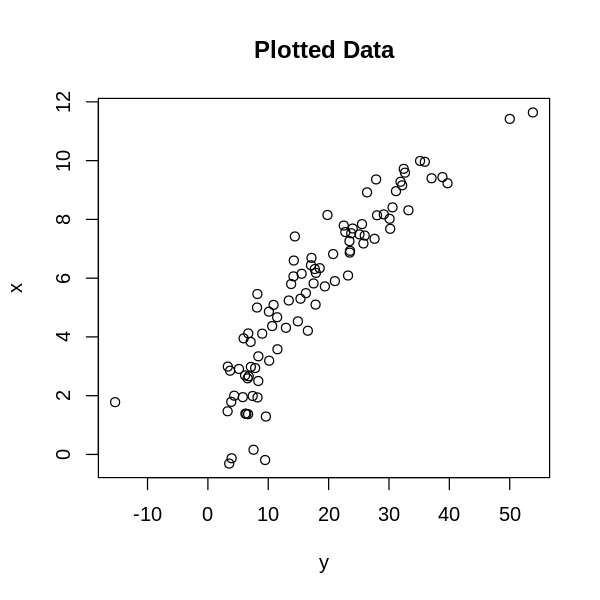

In [12]:
#checking the data to see what model would be appropriate
options(repr.plot.width=5, repr.plot.height=5) # set plot size
plot(x~y, data=data, main="Plotted Data")


Call:
lm(formula = x ~ y, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9321 -0.6281  0.1879  0.6450  3.5597 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.63559    0.22958   7.124 2.49e-10 ***
y            0.22220    0.01091  20.371  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.218 on 90 degrees of freedom
Multiple R-squared:  0.8218,	Adjusted R-squared:  0.8198 
F-statistic:   415 on 1 and 90 DF,  p-value: < 2.2e-16


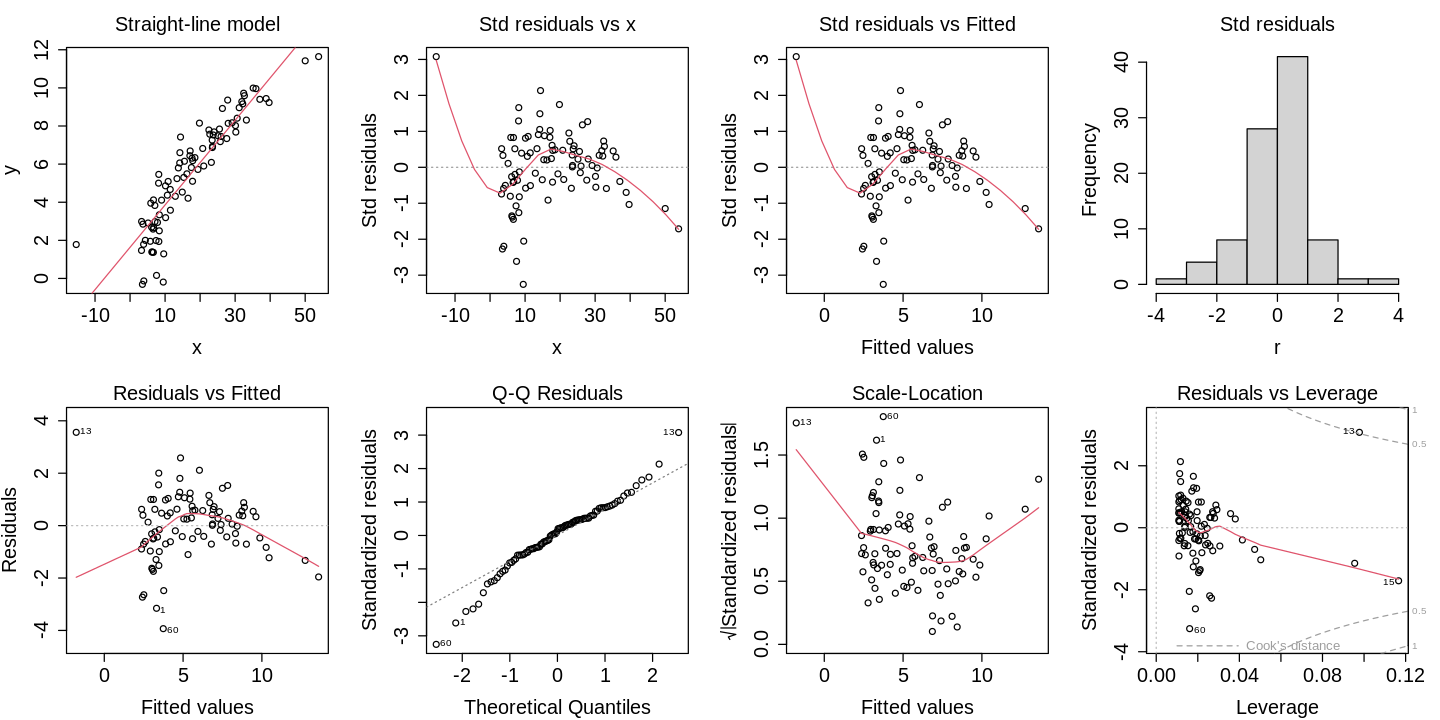

In [15]:
model = lm(x~y, data=data)  # fit the model
summary(model)            # summary statistics

regression_diagnostics(data$y, data$x)

In [7]:
y = data$x
x = data$y
n = length(y)

In [8]:
#using the formulas from lectures to fit a linear regression model to the data
sxx = sum( (x - mean(x))**2 )
sxy = sum( (x - mean(x))*(y - mean(y)) )
sprintf("sxx = %.2f, sxy = %.2f", sxx, sxy)

[1] "sxx = 12461.59, sxy = 2769.02"

In [9]:
b1hat = sxy/sxx
b0hat = mean(y) - b1hat*mean(x)
sprintf("intercept = %.2f, slope = %.2f", b0hat, b1hat)

[1] "intercept = 1.64, slope = 0.22"

In [10]:
#verifying results using in built functions
#confused ab this cause i had to swap my x and y in the table for my results to make sense and match
ResidualAnalysis = lm(x ~ y, data = data)
summary(ResidualAnalysis)


Call:
lm(formula = x ~ y, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9321 -0.6281  0.1879  0.6450  3.5597 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.63559    0.22958   7.124 2.49e-10 ***
y            0.22220    0.01091  20.371  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.218 on 90 degrees of freedom
Multiple R-squared:  0.8218,	Adjusted R-squared:  0.8198 
F-statistic:   415 on 1 and 90 DF,  p-value: < 2.2e-16


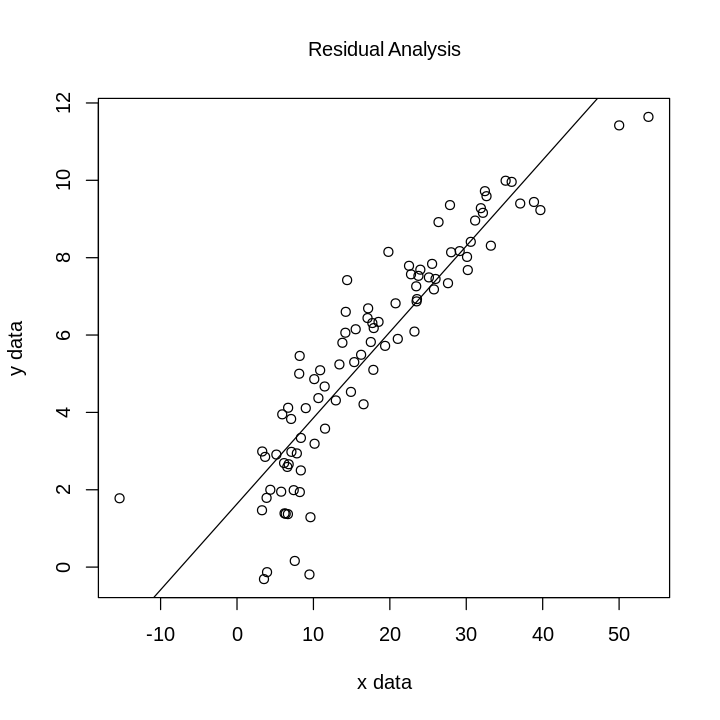

In [11]:
#plotting x vs y
options(repr.plot.width=6, repr.plot.height=6)

plot(x=x, y=y,                     # scatterplot y versus x
     main="Residual Analysis",     # set main title (optional)
     font.main = 1, cex.main=1,    # title font options (optional)
     xlab="x data",              # set x-label (optional)
     ylab="y data"               # set y-label (optional)
    )

abline(a=b0hat, b=b1hat)

### 2. Analysis of Variance

Use formulas derived in lectures to:

- Construct analysis of variance table. (2 marks)

- Test significance of regression and clearly state the outcome of the test. (1 mark)

All necessary quantities must be computed without using any built-in statistical functions. Then use built-in statistical functions to verify your results.

In [ ]:
# write your code here

In [ ]:
# table formatting example

# replace numbers with your variables: SSR, SSE, etc.
table.anova = data.frame(row.names=c("Regression","Residual","Total"),
                         dof=c(0,0,0),
                         SS=c(0,0,0),
                         MS=c(0,0,NA),
                         F=c(0,NA,NA)
                         )

# column names
names(table.anova) = c("d.o.f.", "SS", "MS", "F")

# round numerical values
round(table.anova,3)

,d.o.f.,SS,MS,F
,<dbl>,<dbl>,<dbl>,<dbl>
Regression,0,0,0,0
Residual,0,0,0,NA
Total,0,0,NA,NA


### 3. Confidence intervals and prediction

Let XY be the last two digits of your student ID. Use formulas derived in lectures to find:

- 9Y% confidence interval for the slope. (1 marks)

- 9X% confidence interval for the intercept. (1 mark)

- The mean response at the YX-th percentile of predictor. (1 mark)



In [ ]:
# write your code here

### 4. Plots

Produce a scatter plot of the data. Then draw the fitted regression line (1 mark) and

- 9X% confidence interval for the mean response for the whole x-range. (1 mark)

- 9Y% prediction interval for new observations for the whole x-range. (1 mark)

- Indicate on the plot (with a big red dot) the mean response (at the YX-th percentile of predictor) you found in the previous part. (1 mark)

Your plot should look similar to the one below. All necessary quantities must be computed without using any built-in statistical function.

<img align="left" width="350" height="350" src="https://github.com/uqglmn/sm/blob/3c5d0d8b6dec7951c88479937a5d5ff6f52eab3d/A1/cpi.png?raw=true">

In [ ]:
# write your code here

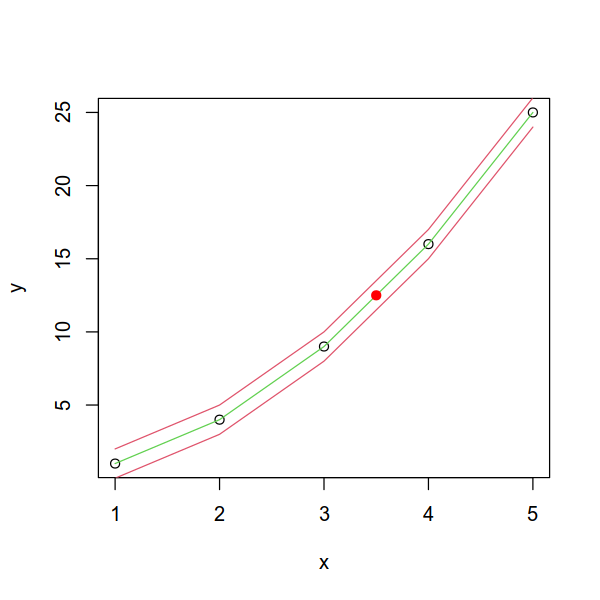

In [ ]:
# curve plotting example

x  = c(1:5)
y  = x^2
y1 = y - 1
y2 = y + 1

options(repr.plot.width=5, repr.plot.height=5)
plot(x, y)
lines(x, y,  col=3)
lines(x, y1, col=2)
lines(x, y2, col=2)
points(3.5, 12.5, pch=19, col="red")

### Memo

- In this assessment you are permitted to use genAI tools (or a proofreader) to proofread your work but not permitted to use AI tools in the creation of your work.
- 10% of marks are allocated for clarity of R code and the overall report quality.
- Verify your work. Restart the kernel and re-run the whole notebook.
- Do not use any local files. The data should be read directly from the github link.
- Make a pdf copy of this notebook and submit together with the notebook.
- If you've used Google Colab to complete this assignment, post a link to your Google Colab notebook in the comments section.

---